Welcome 

In [2]:
import numpy as np
import pandas as pd a
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split


In [3]:
data = fetch_california_housing(as_frame=True)

In [4]:
features = data.feature_names
target = data.target
target_name = data.target_names

In [5]:
features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
data = data.data 

### Distribution of the Target variable

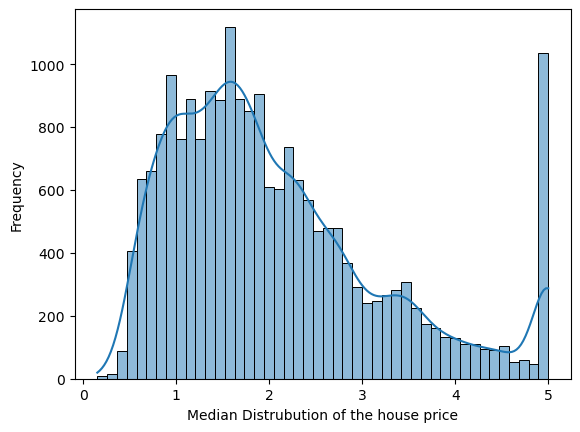

In [7]:
sns.histplot(data, x=target, kde=True)
plt.xlabel("Median Distrubution of the house price")
plt.ylabel("Frequency")
plt.show()

### Pairplot of Features
Purpose: Explore relationships between numerical features to see potential correlations.

Note: For large datasets, consider limiting the number of features in the pairplot to avoid an overly complex plot.

In [8]:
# sns.pairplot(data=data, x_vars=['MedInc', "AveBedrms", 'AveRooms'],
#                         y_vars=['MedInc', "AveBedrms", 'AveRooms'],
#             kind="kde")

# plt.show()

### Heatmap of Feature Correlations
Purpose: Identify linear correlations between features and the target, which can highlight multicollinearity or potential predictors of the target variable.

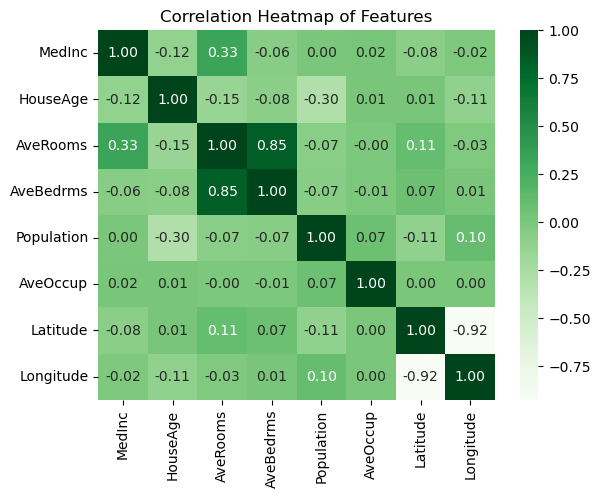

In [9]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="Greens", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

### Scatter Plot of Key Feature Relationships with Target
Purpose: Visualize relationships between important features (e.g., median_income, total_rooms) and the target variable

<Axes: xlabel='MedHouseVal', ylabel='MedInc'>

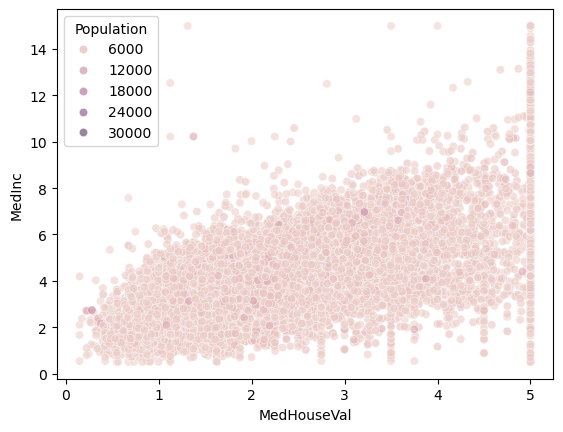

In [10]:
sns.scatterplot(data=data, x=target, y=data.MedInc, alpha=0.6, hue="Population")

<Axes: xlabel='MedHouseVal', ylabel='MedInc'>

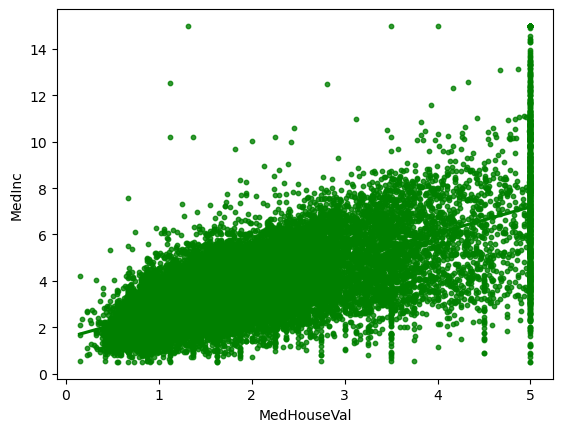

In [11]:
sns.regplot(x=target, y=data.MedInc, scatter_kws={'s':10}, color='green')


### Outlier detection and removal 


Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR


In [12]:
condition = ((data > lower_bound) & (data < upper_bound)).any(axis=1)
data = data[condition]

NameError: name 'lower_bound' is not defined

In [25]:
t_Q1 = target.quantile(0.25)
t_Q3 = target.quantile(0.75)
IQR = t_Q3 - t_Q1
t_lower_bound = t_Q1- 1.5*IQR
t_upper_bound = t_Q3 + 1.5*IQR
target_no_outlier = target[(target > t_lower_bound) & (target < t_upper_bound)]
target_no_outlier

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 19569, dtype: float64

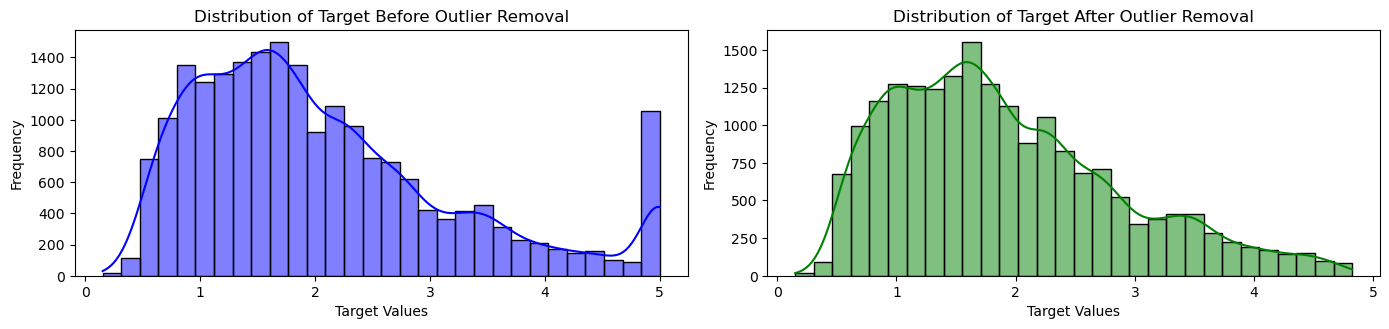

In [53]:
 
# Assuming target is your original target variable and target_no_outlier is the cleaned version
# Plotting the original target distribution and the target distribution after outlier removal

plt.figure(figsize=(14, 6))

# Plot the distribution of the target before removing outliers
plt.subplot(2 , 2, 1)
sns.histplot(target, kde=True, color='blue', bins=30)
plt.title('Distribution of Target Before Outlier Removal')
plt.xlabel('Target Values')
plt.ylabel('Frequency')

# Plot the distribution of the target after removing outliers
plt.subplot(2, 2, 2)
sns.histplot(target_no_outlier, kde=True, color='green', bins=30)
plt.title('Distribution of Target After Outlier Removal')
plt.xlabel('Target Values')
plt.ylabel('Frequency')

 
# Show the plots
plt.tight_layout()
plt.show()


In [46]:
# Spliting the data 
# X is the training data 
# y is the testing data 

X_train, X_test, y_train, y_test = train_test_split(data,target,
                                                   train_size=0.8,
                                                   random_state=42,
                                                   shuffle=True)

In [57]:
# Standardising the data set 
from sklearn.preprocessing import StandardScaler, Normalizer
scalar = StandardScaler()

X_train_scalled = scalar.fit_transform(X_train)
X_test_scalled = scalar.fit_transform(X_test)


In [58]:
scalar.inverse_transform(X_test)

array([[-1.14237625, -0.30073951, -0.43367721, ...,  0.52022395,
         0.22194113,  0.25541734],
       [-0.69050482,  0.098724  , -0.13050312, ..., -0.16293193,
        -0.20947715,  0.02976613],
       [-0.18616932,  1.85636346, -0.51063381, ..., -0.91557569,
         1.03788441, -1.46454628],
       ...,
       [ 2.87008893, -0.30073951,  0.65618087, ..., -0.09978765,
         0.80810728, -1.2689819 ],
       [-0.55565035,  0.57808022, -0.04116447, ..., -0.21494651,
         0.5548835 , -0.120668  ],
       [-0.14789765, -0.93988113, -0.50645235, ...,  0.43607226,
        -0.64089543,  0.57634349]])

In [59]:
# Fitting the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
# predict the output
y_pred = model.predict(X_test_scalled)

(16512, 8)

### Evakuate the model
1. #### MSE

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
mse = mean_squared_error(y_test, y_pre)

In [65]:
mse

0.5388649914036734

#### R² represents the proportion of the variance in the dependent variable (house values) that is predictable from the independent variables. A higher R² indicates better model fit.`mm

In [67]:
r2 = r2_score(y_test, y_pre)

In [68]:
r2

0.588781059690961

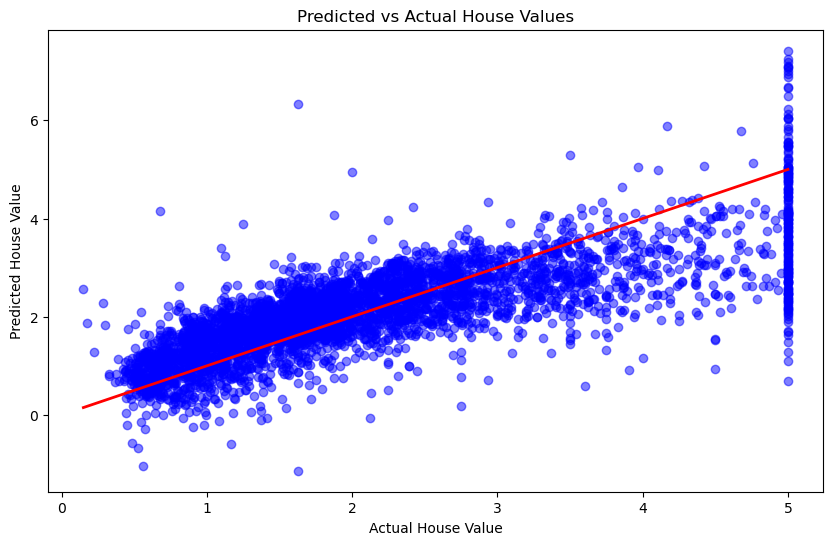

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Ideal line
plt.title("Predicted vs Actual House Values")
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.show()


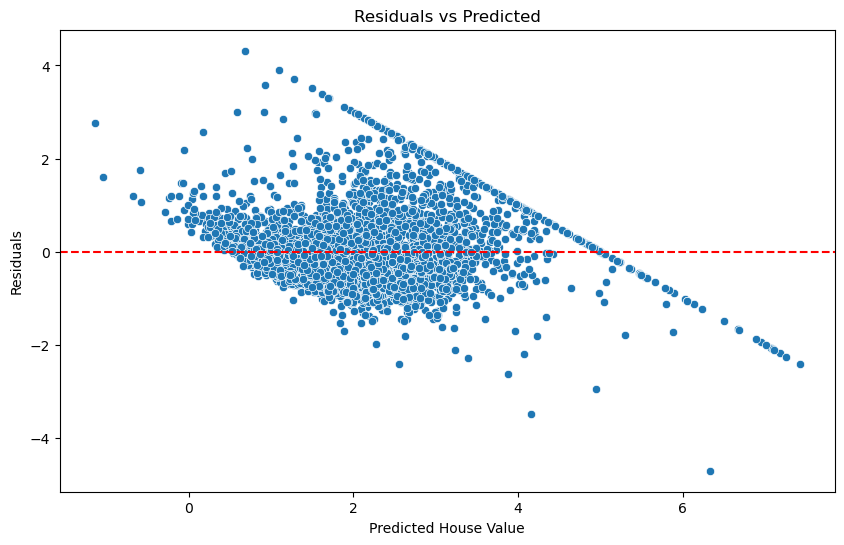

In [72]:
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted House Value")
plt.ylabel("Residuals")
plt.show()


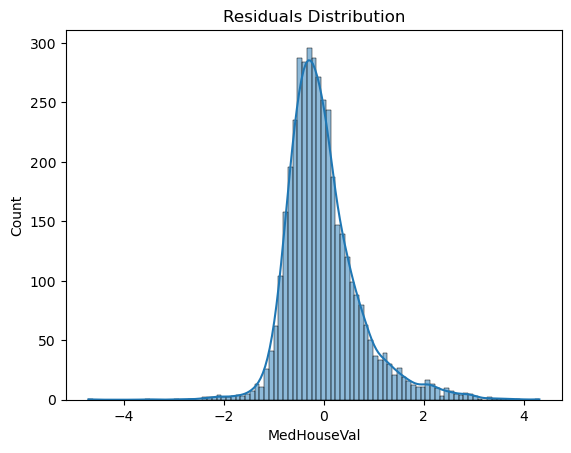

In [73]:
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()


In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define model and parameter grid
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Initialize GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scalled, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best Parameters: {'alpha': 0.1}
Best Score: -0.5192651994657131
